<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/main/FS_Dimension_reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remove outliers before normalization


Have you missed some outliers?
Are there still missing values?
Is the data normalized?

In [1]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap


df = pd.read_csv('num_UMAP_df.csv')
df2 = pd.read_csv('cat_UMAP_df.csv')

In [3]:
df

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,...,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
0,0,18,2,5,1,0,1,0.00,0.00,0.00,...,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0
1,1,17,2,2,2,0,1,12.82,6.39,0.00,...,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0
2,2,38,1,2,2,0,1,9.20,0.00,0.00,...,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0
3,3,27,2,3,1,0,2,0.00,13.70,0.00,...,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0
4,4,20,2,5,0,0,2,14.57,40.87,0.00,...,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,30,1,1,1,91,91,0.00,0.00,18.04,...,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0
31871,31884,27,1,1,0,91,91,18.04,0.00,0.00,...,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0
31872,31885,24,1,1,1,91,91,0.00,0.00,0.00,...,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0
31873,31886,34,1,1,0,91,91,0.00,12.03,0.00,...,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0


In [4]:
# df_normalized = df_normalized.drop(columns=['Unnamed: 0'])


# dropping HR 0-23 for grouped columns for time of day,

# first & last order are taken in recency column so dropped

# By order percentage:

# High (>30%): Asian, American
# Medium (10-30%): OTHER, Italian, Japanese
# Low (<10%): remaining cuisines

# By Customer Lifetime Value (CLV) Score:

# High CLV (0.3-0.5)
# Medium CLV (0.2-0.3)
# Low CLV (0.0-0.2)

# By Age Group:

# <18
# 18-24
# 25-34
# 35-44
# 45-54
# 55+

# By Loyalty Rank:

# High (4.0 - 8.0)
# Medium (2.0 - 4.0)
# Low (0.0 - 2.0)

import pandas as pd

# Assuming df is your original DataFrame
df_copy = df.copy()

# Define columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
                   'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
                   'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
                   'HR_22', 'HR_23', 'first_order', 'last_order', 'customer_age']

# # CLV Score
# df['CLV_Group'] = pd.cut(df['CLV_Score'], bins=[0, 0.2, 0.3, 0.5], labels=['Low', 'Medium', 'High'])


# # Loyalty Rank
# df['Loyalty_Group'] = pd.cut(df['Loyalty_Rank'], bins=[0, 2, 4, 8], labels=['Low', 'Medium', 'High'])

# , 'CUI_Asian', 'CUI_American', 'CUI_OTHER', 'CUI_Italian', 'CUI_Japanese', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
                    #  'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
                    #  'CUI_Street_Food/Snacks', 'CUI_Thai'

# # Define cuisine groups
# high_freq_cuisines = ['CUI_Asian', 'CUI_American']
# medium_freq_cuisines = ['CUI_OTHER', 'CUI_Italian', 'CUI_Japanese']
# low_freq_cuisines = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
#                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
#                      'CUI_Street_Food/Snacks', 'CUI_Thai']

# # Create Age Group column
df_copy['Age_Group'] = pd.cut(df_copy['customer_age'], bins=[0, 18, 24, 34, 44, 54, 100], labels=['<18', '18-24', '25-34', '35-44', '45-54', '55+'])

# # Create a new column 'cuisine_group'
# def assign_cuisine_group(row):
#     if any(row[col] == 1 for col in high_freq_cuisines):
#         return '1'
#     elif any(row[col] == 1 for col in medium_freq_cuisines):
#         return '2'
#     else:
#         return '3'

# df_copy['cuisine_group'] = df_copy.apply(assign_cuisine_group, axis=1)

# Drop the specified columns
df_grouped = df_copy.drop(columns=columns_to_drop)

df_grouped

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,...,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.020362,0.092846,0,0,0,0,2,0,<18
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,...,0.250000,0.013544,0.090596,0,0,2,0,0,0,<18
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.006487,0.088267,0,0,2,0,0,0,35-44
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,...,0.166667,0.022252,0.066010,0,0,1,1,0,0,25-34
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,...,0.166667,0.039088,0.071566,0,0,2,0,0,0,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,...,0.250000,0.012719,0.416697,0,0,0,1,0,0,25-34
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.012719,0.416697,0,0,0,0,1,0,25-34
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0.250000,0.012543,0.416639,0,1,0,0,0,0,18-24
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,...,0.250000,0.008482,0.415299,0,0,1,0,0,0,25-34


In [5]:

# By Customer Region (Order %):

# Regions: 8670, 4660, 2360
# Order % Range: 27.7% to 30.62%

# Regions: 2440, 4140, 8370, 8550
# Order % Range: 0,04 to 4.65%

# Define the regions (as strings)
main_regions = ['8670', '4660', '2360']
other_regions = ['2440', '4140', '8370', '8550']

# Create new columns for main regions
for region in main_regions:
    df2[f'Region_{region}'] = (df2['customer_region'] == region).astype(int)

# Create a single column for other regions
df2['Region_Other'] = (df2['customer_region'].isin(other_regions)).astype(int)

# If the customer_region contains a string like 'Region_8670',
# extract the numeric part:
df2['Region_Numeric'] = df2['customer_region'].str.extract('(\d+)')

# Now use the numeric region for comparison
for region in main_regions:
    df2[f'Region_{region}'] = (df2['Region_Numeric'] == region).astype(int)

df2['Region_Other'] = (df2['Region_Numeric'].isin(other_regions)).astype(int)

# Drop temporary and original columns
cat_df_grouped = df2.drop(columns=['customer_region', 'Region_Numeric'])

cat_df_grouped.head()

,Unnamed: 0,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,DELIVERY,DIGI,0,0,1,0
1,1,DISCOUNT,DIGI,1,0,0,0
2,2,DISCOUNT,CASH,0,1,0,0
3,3,DELIVERY,DIGI,0,1,0,0
4,4,-,DIGI,0,1,0,0


In [6]:
# Merge the two DataFrames on 'Unnamed: 0'
merged_df = pd.merge(df_grouped, cat_df_grouped, on='Unnamed: 0', how='inner')

# Print the merged DataFrame
merged_df

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,...,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0,2,0,<18,DELIVERY,DIGI,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,...,0,0,0,<18,DISCOUNT,DIGI,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,...,0,0,0,35-44,DISCOUNT,CASH,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,...,1,0,0,25-34,DELIVERY,DIGI,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,...,0,0,0,18-24,-,DIGI,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,...,1,0,0,25-34,FREEBIE,DIGI,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,...,0,1,0,25-34,DELIVERY,DIGI,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,...,0,0,0,18-24,-,DIGI,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,...,0,0,0,25-34,DISCOUNT,DIGI,1,0,0,0


In [7]:
for col in ['Age_Group', 'last_promo', 'payment_method']:
  print(f"Unique values for {col}: {merged_df[col].unique()}")

Unique values for Age_Group: ['<18', '35-44', '25-34', '18-24', '45-54', '55+']
Categories (6, object): ['<18' < '18-24' < '25-34' < '35-44' < '45-54' < '55+']
Unique values for last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values for payment_method: ['DIGI' 'CASH' 'CARD']


In [8]:
import pandas as pd

# Assuming encoded_df is your DataFrame
encoded_df = pd.get_dummies(merged_df,
                            columns=['payment_method', 'Age_Group',
                                     'Age_Group', 'last_promo'])
# Specify all columns to one-hot encode

encoded_df = encoded_df.drop(columns=['Unnamed: 0'])

In [9]:
import pandas as pd

# Create mapping dictionaries
age_group_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

last_promo_mapping = {
    '-': 0,        # Using '-' as baseline
    'DELIVERY': 1,
    'DISCOUNT': 2,
    'FREEBIE': 3
}

payment_method_mapping = {
    'CASH': 0,     # Arbitrary ordering
    'CARD': 1,
    'DIGI': 2
}

def encode_categories(df):
    """
    Encode categorical variables in the dataframe using the defined mappings
    and drop the original columns

    Parameters:
    df (pandas.DataFrame): DataFrame containing the categorical columns

    Returns:
    pandas.DataFrame: DataFrame with encoded columns and original columns dropped
    """
    df_encoded = df.copy()
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping,
        'payment_method': payment_method_mapping
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    return df_encoded

# Example usage:
df_encoded = encode_categories(merged_df)

In [10]:
pd.set_option('display.max_columns', None)
df_encoded

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,0,1,2,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,0,2,2,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,3,2,0,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,2,1,2,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,1,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,2,3,2,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,2,1,2,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,1,0,2,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,2,2,2,1,0,0,0


In [11]:
def encode_categories(df):
    df_encoded = df.copy()
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping,
        'payment_method': payment_method_mapping
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    return df_encoded

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    """
    Complete preprocessing pipeline with median imputation,
    IQR-based outlier removal, and standardization
    """
    # Store original column names
    original_columns = df.columns

    # Drop non-numeric columns
    df_numeric = df.select_dtypes(include='number')

    # 1. Median Imputation
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(
        imputer.fit_transform(df_numeric),
        columns=df_numeric.columns
    )

    # 2. Outlier Removal using 3 IQR
    Q1 = df_imputed.quantile(0.25)
    Q3 = df_imputed.quantile(0.75)
    IQR = Q3 - Q1

    # Create mask for values within 3 IQR
    mask = ~((df_imputed < (Q1 - 3 * IQR)) | (df_imputed > (Q3 + 3 * IQR))).any(axis=1)
    df_clean = df_imputed[mask]

    # 3. Standardization
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_clean),
        columns=df_numeric.columns
    )
    print("Original columns:", df.columns)
    df_numeric = df.select_dtypes(include='number')
    print("Numeric columns:", df_numeric.columns)
    return df_scaled, mask

# Function to get preprocessing stats
def get_preprocessing_stats(original_df, final_df, mask):
    stats = {
        'original_rows': len(original_df),
        'rows_after_outlier_removal': len(final_df),
        'outliers_removed': len(original_df) - len(final_df),
        'outlier_percentage': (1 - len(final_df)/len(original_df)) * 100
    }
    return stats

# Example usage:
df_scaled, mask = preprocess_data(df_encoded)
stats = get_preprocessing_stats(df_encoded, df_scaled, mask)
print(stats)

Original columns: Index(['Unnamed: 0', 'vendor_count', 'product_count', 'is_chain',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
       'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'Total_Orders_Per_Client',
       'mnt', 'mnt_Per_Order', 'Items_Per_Order', 'frq', 'rcn', 'activity',
       'CUI_diversity', 'Loyalty', 'Recency_Score', 'Frequency_Score',
       'Monetary_Score', 'CLV_Score', 'Orders_Night', 'Orders_Dawn',
       'Orders_Morning', 'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk',
       'Age_Group', 'last_promo', 'payment_method', 'Region_8670',
       'Region_4660', 'Region_2360', 'Region_Other'],
      dtype='object')
Numeric columns: Index(['Unnamed: 0', 'vendor_count', 'product_count', 'is_chain',
       'CUI_American', 'CUI_

In [13]:
print(df_encoded['Age_Group'].dtype)

int64


In [14]:
df_encoded

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,0,1,2,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,0,2,2,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,3,2,0,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,2,1,2,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,1,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,2,3,2,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,2,1,2,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,1,0,2,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,2,2,2,1,0,0,0


In [15]:
df_scaled

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,-2.235769,0.979417,-0.046513,-0.221725,0.154271,0.025505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,1.639046,-0.472928,-0.491353,-0.551551,-0.557240,1.300011,0.213838,0.124857,-0.209203,-0.530097,-0.827479,1.573129,-0.083417,2.071756,-0.612432,-0.666932,-0.827479,0.124857,-1.159091,0.0,0.0,1.614984,-0.640157,-0.740094,0.0,0.289412,1.905794,0.0,1.323096,-0.953617,-0.391753,0.0
1,-2.235069,-0.507986,0.748924,0.696294,-0.792272,1.962870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,1.593942,-0.491353,-0.551551,-0.557240,1.300011,0.213838,1.782226,1.228864,0.952750,-0.841675,1.532872,-0.040055,-0.245469,1.444223,-0.664349,-0.841675,1.782226,-1.067705,0.0,0.0,1.614984,-0.640157,-0.740094,0.0,0.289412,-0.928874,0.0,1.323096,-0.953617,-0.391753,0.0
2,-2.234719,0.979417,-0.046513,-0.221725,-0.792272,1.144835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,1.593942,-0.491353,-0.551551,-0.557240,1.300011,0.213838,0.835426,0.405717,-0.530097,-0.841675,1.532872,-0.040055,-0.245469,-0.612432,-0.664349,-0.841675,0.835426,-1.126829,0.0,0.0,1.614984,-0.640157,-0.740094,0.0,0.289412,-0.928874,0.0,1.323096,-0.953617,-0.391753,0.0
3,-2.232735,-0.507986,0.748924,1.614312,1.569534,-0.948848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931967,-0.425068,-0.472928,-0.491353,-0.551551,-0.557240,1.300011,1.166022,-0.128248,-0.851778,-0.530097,-0.799705,1.331587,0.176756,-0.245469,2.129775,-0.650326,-0.799705,-0.128248,-1.138989,0.0,0.0,0.437911,0.666737,0.385307,0.0,0.289412,-0.928874,0.0,-0.755803,1.048639,-0.391753,0.0
4,-2.229583,0.979417,-0.046513,0.696294,-0.792272,0.561682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,-0.551551,1.224719,1.300011,0.213838,0.160479,-0.179921,-0.530097,-0.927863,1.130302,0.393566,-0.245469,-0.612432,-0.634146,-0.927863,0.160479,-1.234313,0.0,0.0,-0.739162,0.666737,0.385307,0.0,1.500426,-0.928874,0.0,1.323096,-0.953617,-0.391753,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1.461256,-0.507986,-0.841950,-0.221725,0.122416,-0.948848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,1.318650,-0.557240,-0.532740,-0.738346,-1.022552,-0.715129,-0.530097,1.088943,-1.365635,-0.777210,-0.245469,-0.612432,4.047192,1.088943,-1.022552,3.259056,0.0,0.0,0.437911,-0.640157,-0.740094,0.0,0.289412,-0.928874,0.0,-0.755803,-0.953617,2.552631,0.0
1176,1.462190,-0.507986,-0.841950,-0.221725,-0.792272,-0.154301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,1.318650,-0.557240,-0.532740,-0.738346,-0.668205,-0.100209,-0.530097,1.088943,-1.365635,-0.777210,-0.245469,-0.612432,4.047192,1.088943,-0.668205,3.281184,0.0,0.0,-0.739162,-0.640157,0.385307,0.0,-0.921602,-0.928874,0.0,-0.755803,1.048639,-0.391753,0.0
1177,1.464174,-0.507986,-0.046513,-0.221725,1.895667,-0.948848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,1.318650,-0.557240,-0.532740,-0.738346,0.073299,1.186568,2.435596,1.088943,-1.365635,-0.777210,-0.245469,-0.612432,4.047192,1.088943,0.073299,3.327488,0.0,0.0,-0.739162,-0.640157,0.385307,0.0,-0.921602,0.016

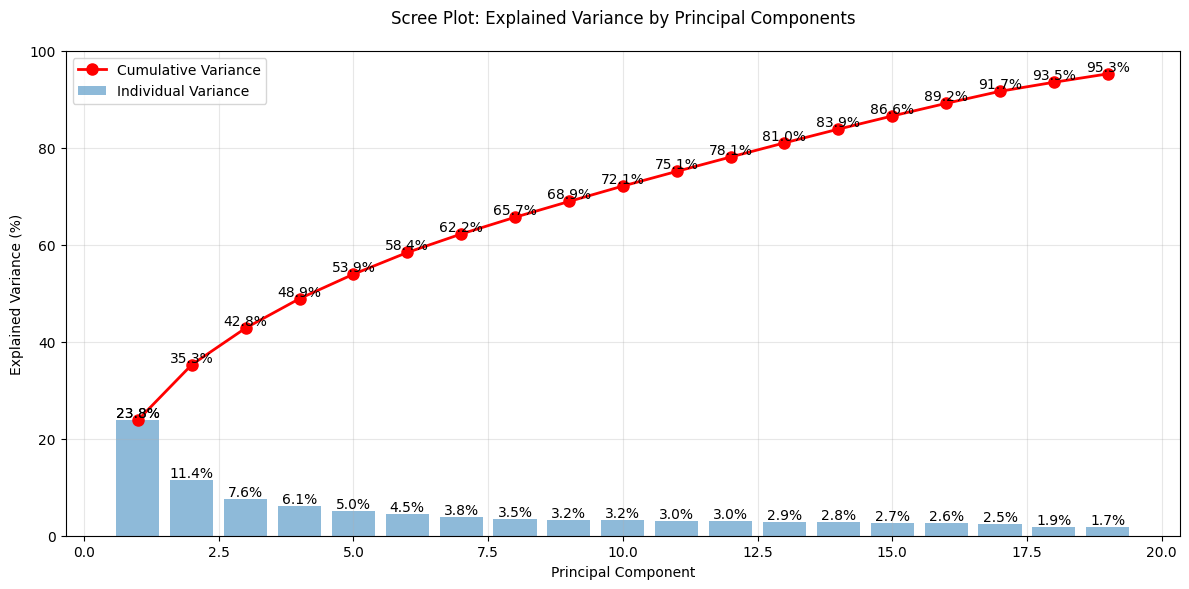

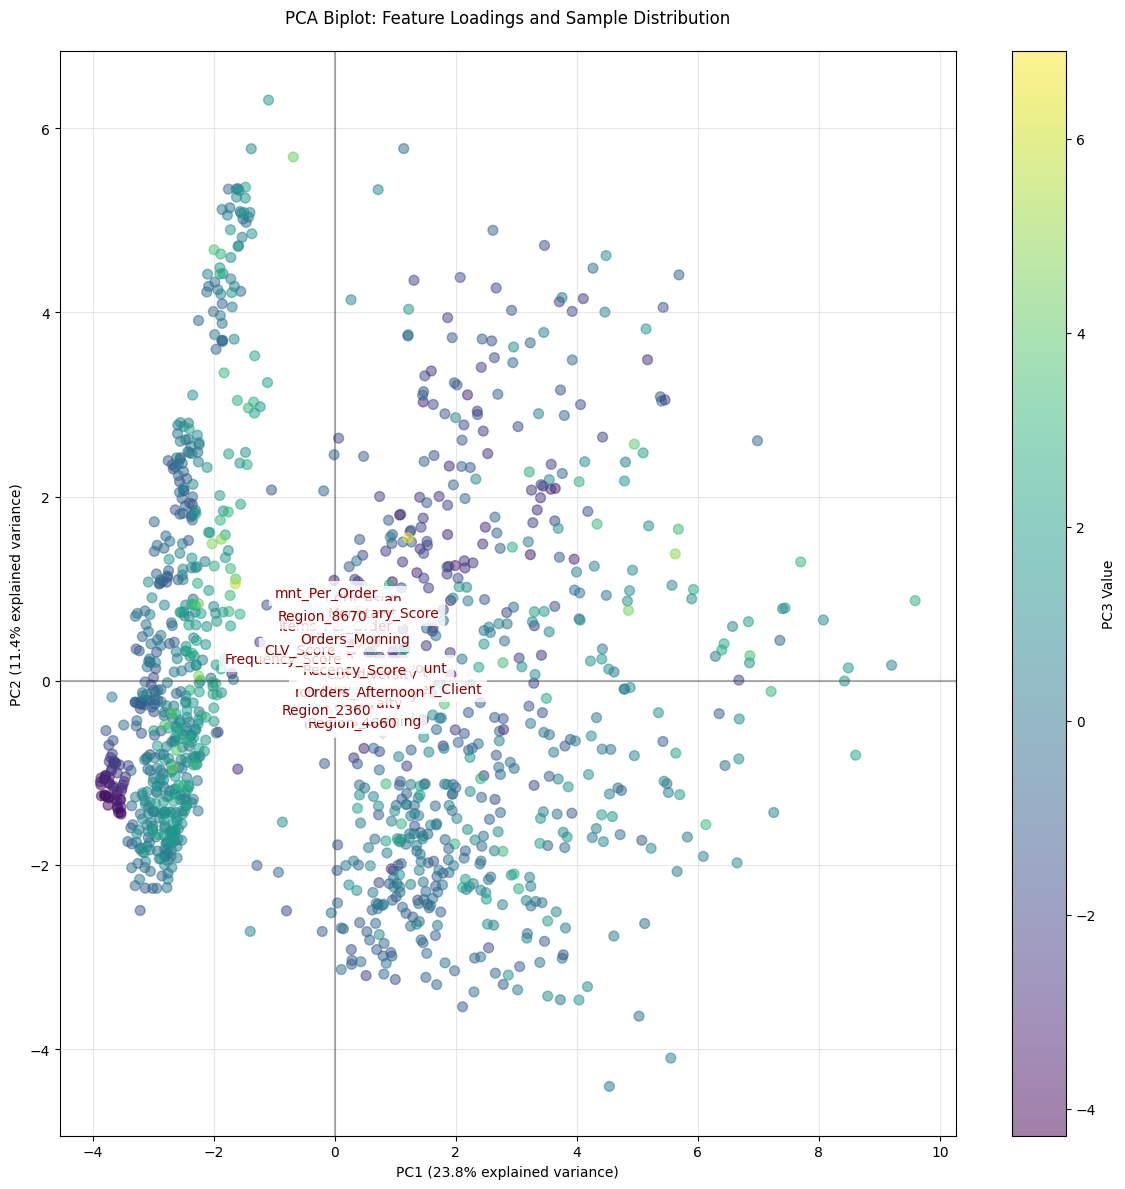


Principal Component Analysis Summary:
Total variance explained by 19 components: 95.3%

Principal Component 1 (23.8% variance explained):

Significant loadings (abs > 0.2):
Total_Orders_Per_Client: 0.329
product_count: 0.320
activity: 0.294
frq: -0.261
Frequency_Score: -0.261
mnt: 0.247
Monetary_Score: 0.247
vendor_count: 0.235
is_chain: 0.221
Loyalty: 0.217

Principal Component 2 (11.4% variance explained):

Significant loadings (abs > 0.2):
mnt_Per_Order: 0.420
CUI_Asian: 0.392
Monetary_Score: 0.323
mnt: 0.323
Region_8670: 0.310
Items_Per_Order: 0.262
CUI_American: -0.212
Region_4660: -0.202
Orders_Morning: 0.200

Principal Component 3 (7.6% variance explained):

Significant loadings (abs > 0.2):
CLV_Score: 0.428
Region_8670: -0.334
Recency_Score: 0.322
Unnamed: 0: 0.319
Region_4660: 0.315
rcn: -0.276
Frequency_Score: 0.254
frq: 0.254
Orders_Morning: -0.213

Principal Component 4 (6.1% variance explained):

Significant loadings (abs > 0.2):
rcn: 0.462
Recency_Score: -0.426
Unnamed: 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2):
    """
    Perform PCA analysis with enhanced visualizations and insights

    Args:
        df_scaled: Scaled/normalized DataFrame
        n_components: Number of PCA components to calculate
        loading_threshold: Threshold for considering significant loadings
    """
    # Apply PCA
    pca = PCA(n_components=0.95)
    principal_components = pca.fit_transform(df_scaled)

    # Create DataFrame for principal components
    n_components = pca.n_components_
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )

    # Calculate explained variance and cumulative variance
    explained_variance = pca.explained_variance_ratio_ * 100
    cumulative_variance = np.cumsum(explained_variance)

    # 1. Enhanced Scree Plot
    plt.figure(figsize=(12, 6))

    # Plot bars for individual variance
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)

    # Plot line for cumulative variance
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
             'ro-', linewidth=2, markersize=8)

    plt.grid(True, alpha=0.3)
    plt.title('Scree Plot: Explained Variance by Principal Components', pad=20)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance (%)')

    # Add value labels
    for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
        plt.text(i+1, ev, f'{ev:.1f}%', ha='center', va='bottom')
        plt.text(i+1, cv, f'{cv:.1f}%', ha='center', va='bottom')

    plt.legend(['Cumulative Variance', 'Individual Variance'])
    plt.tight_layout()
    plt.savefig('scree_plot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 2. Enhanced Biplot
    plt.figure(figsize=(12, 12))

    # Calculate loadings and scale them for visualization
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Create scatter plot of samples
    scatter = plt.scatter(principal_components[:,0], principal_components[:,1],
                         c=principal_components[:,2], cmap='viridis',
                         alpha=0.5, s=50)
    plt.colorbar(scatter, label='PC3 Value')

    # Plot loadings (feature vectors)
    for i, (feature, loading) in enumerate(zip(df_scaled.columns, loadings)):
        # Only plot significant loadings
        if abs(loading[0]) > loading_threshold or abs(loading[1]) > loading_threshold:
            plt.arrow(0, 0, loading[0], loading[1],
                     color='r', alpha=0.5, head_width=0.05)

            # Adjust text position for better readability
            text_x = loading[0] * 1.15
            text_y = loading[1] * 1.15

            # Add background to text for better visibility
            plt.text(text_x, text_y, feature,
                    color='darkred', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    plt.grid(True, alpha=0.3)
    plt.xlabel(f'PC1 ({explained_variance[0]:.1f}% explained variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.1f}% explained variance)')
    plt.title('PCA Biplot: Feature Loadings and Sample Distribution', pad=20)

    # Add axis lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.savefig('biplot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 3. Print detailed loadings analysis
    print("\nPrincipal Component Analysis Summary:")
    print(f"Total variance explained by {n_components} components: {cumulative_variance[-1]:.1f}%")

    for i in range(n_components):
        print(f"\nPrincipal Component {i+1} ({explained_variance[i]:.1f}% variance explained):")

        # Sort loadings by absolute value
        loadings_dict = dict(zip(df_scaled.columns, pca.components_[i]))
        sorted_loadings = sorted(loadings_dict.items(),
                               key=lambda x: abs(x[1]),
                               reverse=True)

        # Print significant loadings
        print("\nSignificant loadings (abs > {}):".format(loading_threshold))
        for feature, loading in sorted_loadings:
            if abs(loading) > loading_threshold:
                print(f"{feature}: {loading:.3f}")

    return pca_df, pca

# Example usage:
pca_df, pca_model = perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2)

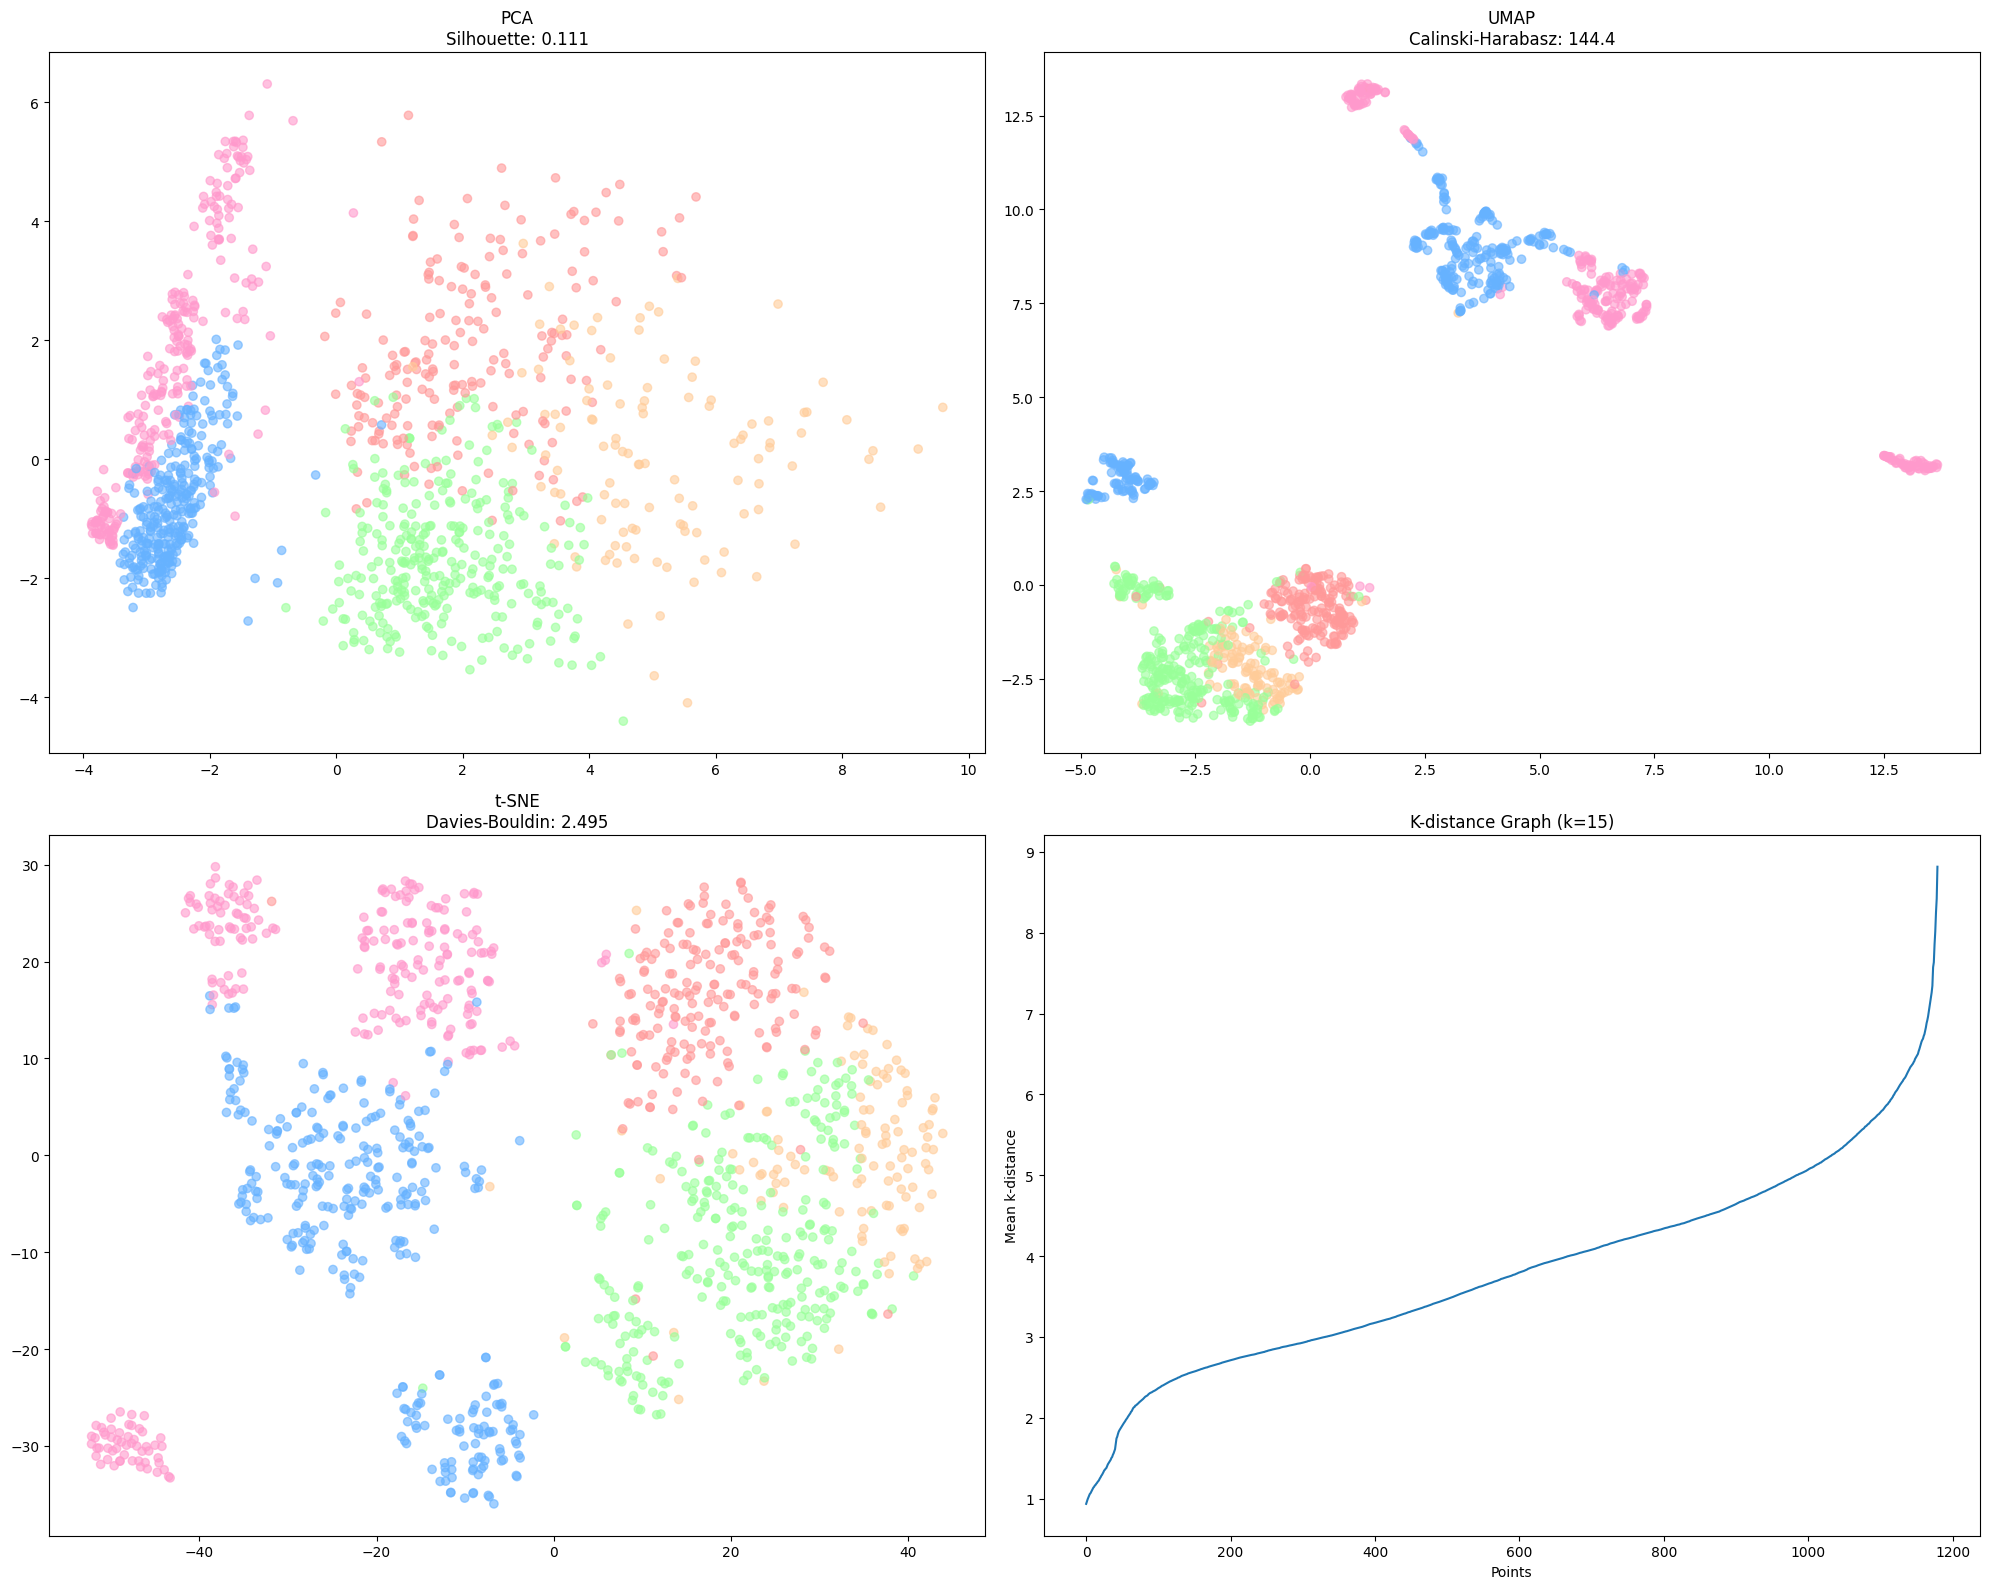

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

def dimensionality_analysis(df_scaled, n_neighbors=15, min_dist=0.1):
    """
    Perform dimensionality reduction analysis using PCA, UMAP, and t-SNE.
    """
    # PCA with 95% variance
    pca = PCA(n_components=0.95)
    pca_results = pca.fit_transform(df_scaled)

    # UMAP - fixed n_jobs parameter
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=42,
        n_jobs=1
    )
    umap_results = reducer.fit_transform(df_scaled)

    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)

    # K-means clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(pca_results)

    # Calculate quality scores
    scores = {
        'silhouette': silhouette_score(pca_results, clusters),
        'calinski': calinski_harabasz_score(pca_results, clusters),
        'davies': davies_bouldin_score(pca_results, clusters)
    }

    # Visualization
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    plot_params = [
        (pca_results, 'PCA', f'Silhouette: {scores["silhouette"]:.3f}'),
        (umap_results, 'UMAP', f'Calinski-Harabasz: {scores["calinski"]:.1f}'),
        (tsne_results, 't-SNE', f'Davies-Bouldin: {scores["davies"]:.3f}')
    ]

    for idx, (results, title, score) in enumerate(plot_params):
        row, col = divmod(idx, 2)
        axes[row, col].scatter(
            results[:, 0],
            results[:, 1],
            c=[colors[c] for c in clusters],
            alpha=0.6
        )
        axes[row, col].set_title(f'{title}\n{score}')

    # K-distance plot
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(pca_results)
    distances, _ = nbrs.kneighbors(pca_results)
    dist = np.sort(distances, axis=0)
    axes[1, 1].plot(dist[:, 1:].mean(axis=1))
    axes[1, 1].set_title(f'K-distance Graph (k={n_neighbors})')
    axes[1, 1].set_xlabel('Points')
    axes[1, 1].set_ylabel('Mean k-distance')

    plt.tight_layout()
    plt.savefig('dimensionality_analysis.svg', format='svg', bbox_inches='tight')
    plt.show()

    return {
        'pca': pca_results,
        'umap': umap_results,
        'tsne': tsne_results,
        'clusters': clusters,
        'scores': scores
    }
# Example usage:
results = dimensionality_analysis(df_scaled)

a silhouette score of 0.111 is quite low. Generally:

< 0.25: Poor clustering
0.25-0.50: Fair clustering


0.50: Good clustering



To improve:

Try different numbers of clusters (3-7)
Feature selection/reduction
Test different clustering algorithms (DBSCAN, Agglomerative)
Handle outliers more aggressively
Consider normalizing instead of standardizing

Would you like me to implement any of these approaches?

<ipython-input-18-f5777e8c6ed9>:55: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


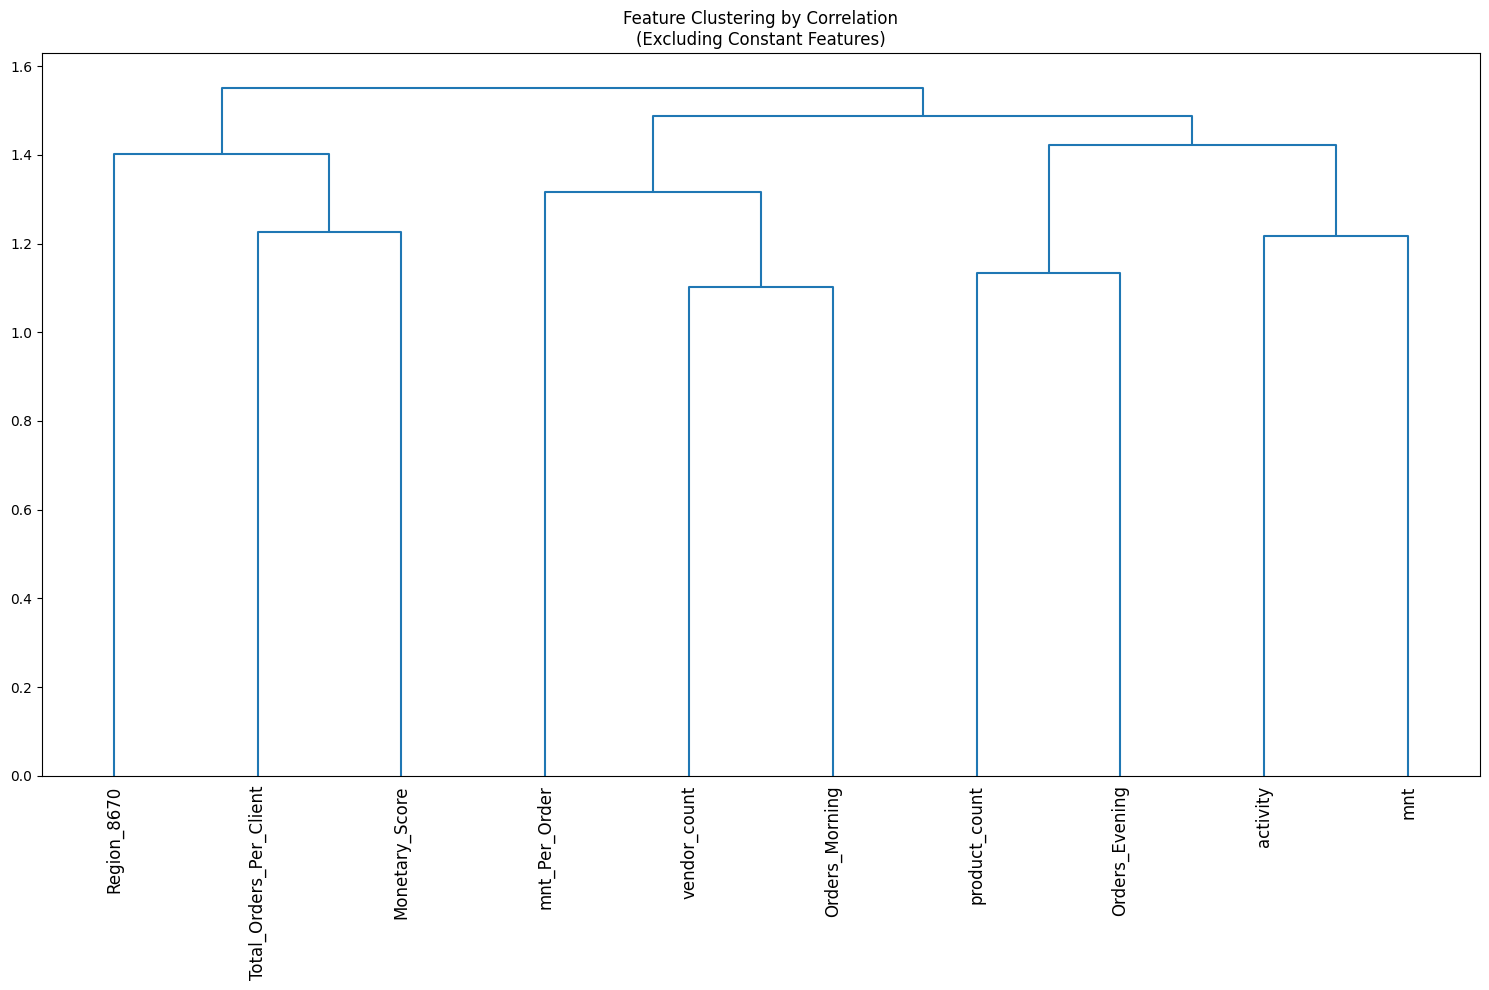

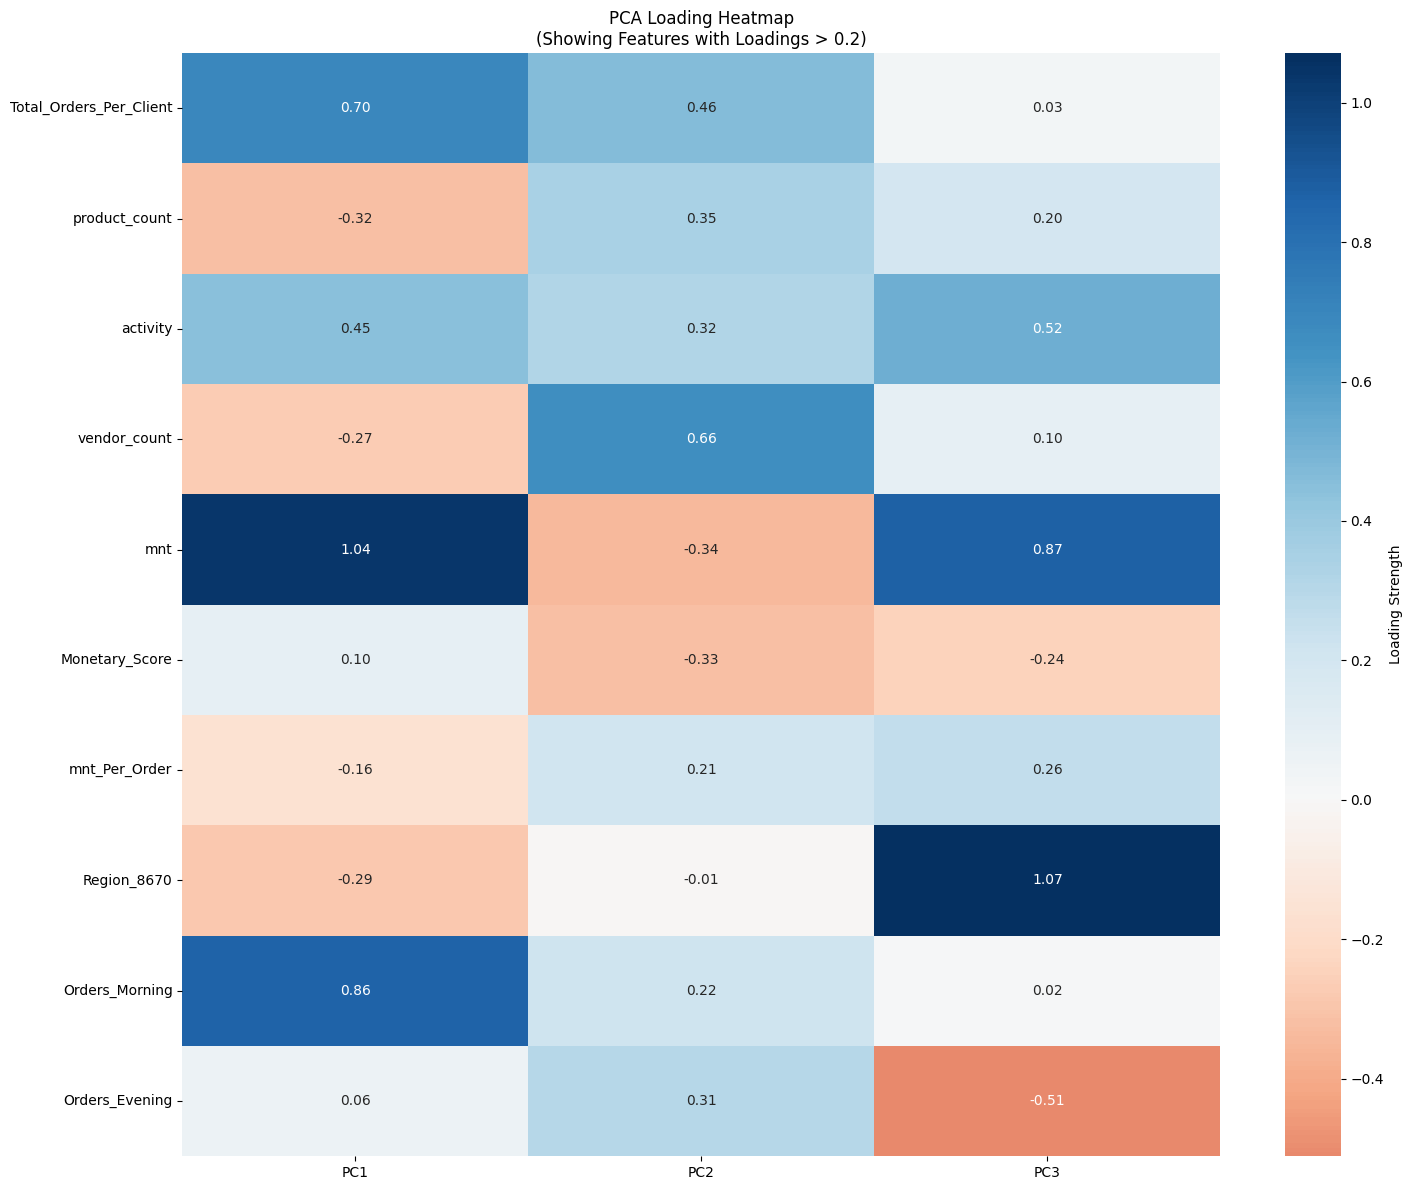

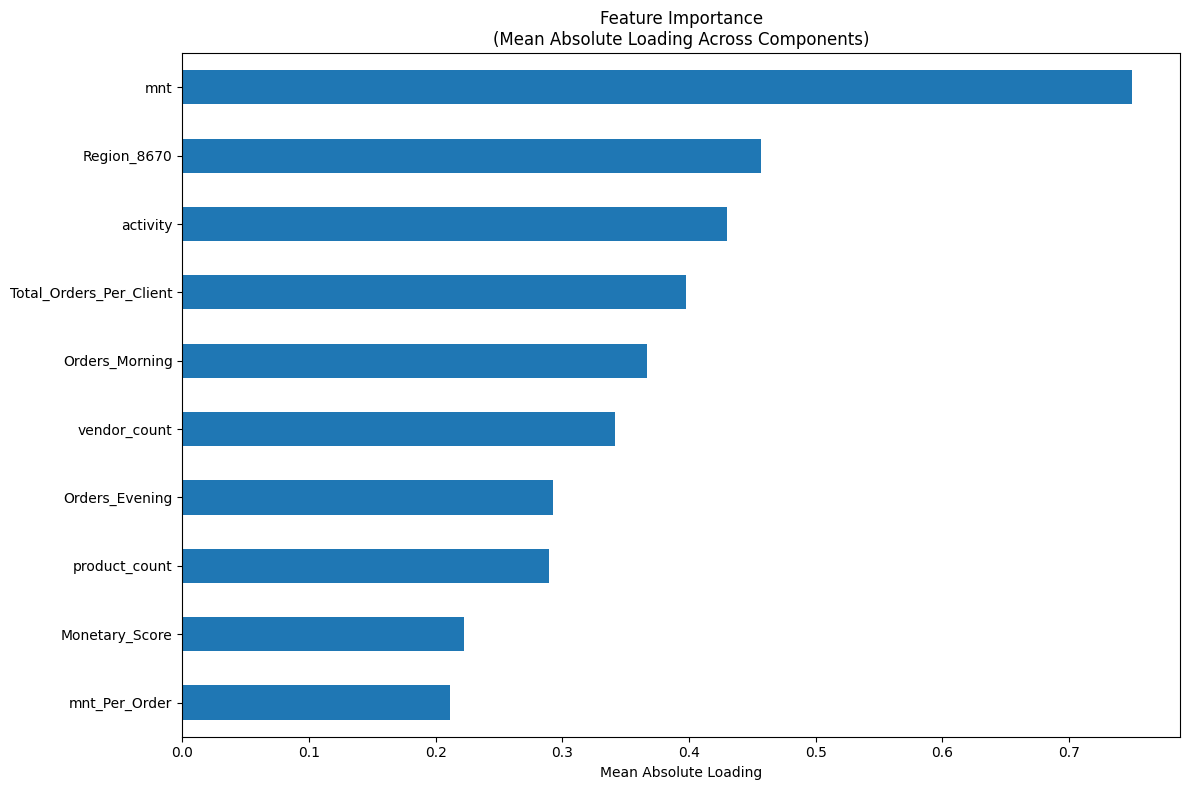


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

High importance features to keep:
   - vendor_count
   - Orders_Morning
   - Total_Orders_Per_Client
   - activity
   - Region_8670
   - mnt

Consider combining or reducing dimensionality of:
   - mnt_Per_Order
   - Monetary_Score
   - product_count
   - Orders_Evening

Consider dropping (low importance):


<ipython-input-18-f5777e8c6ed9>:55: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


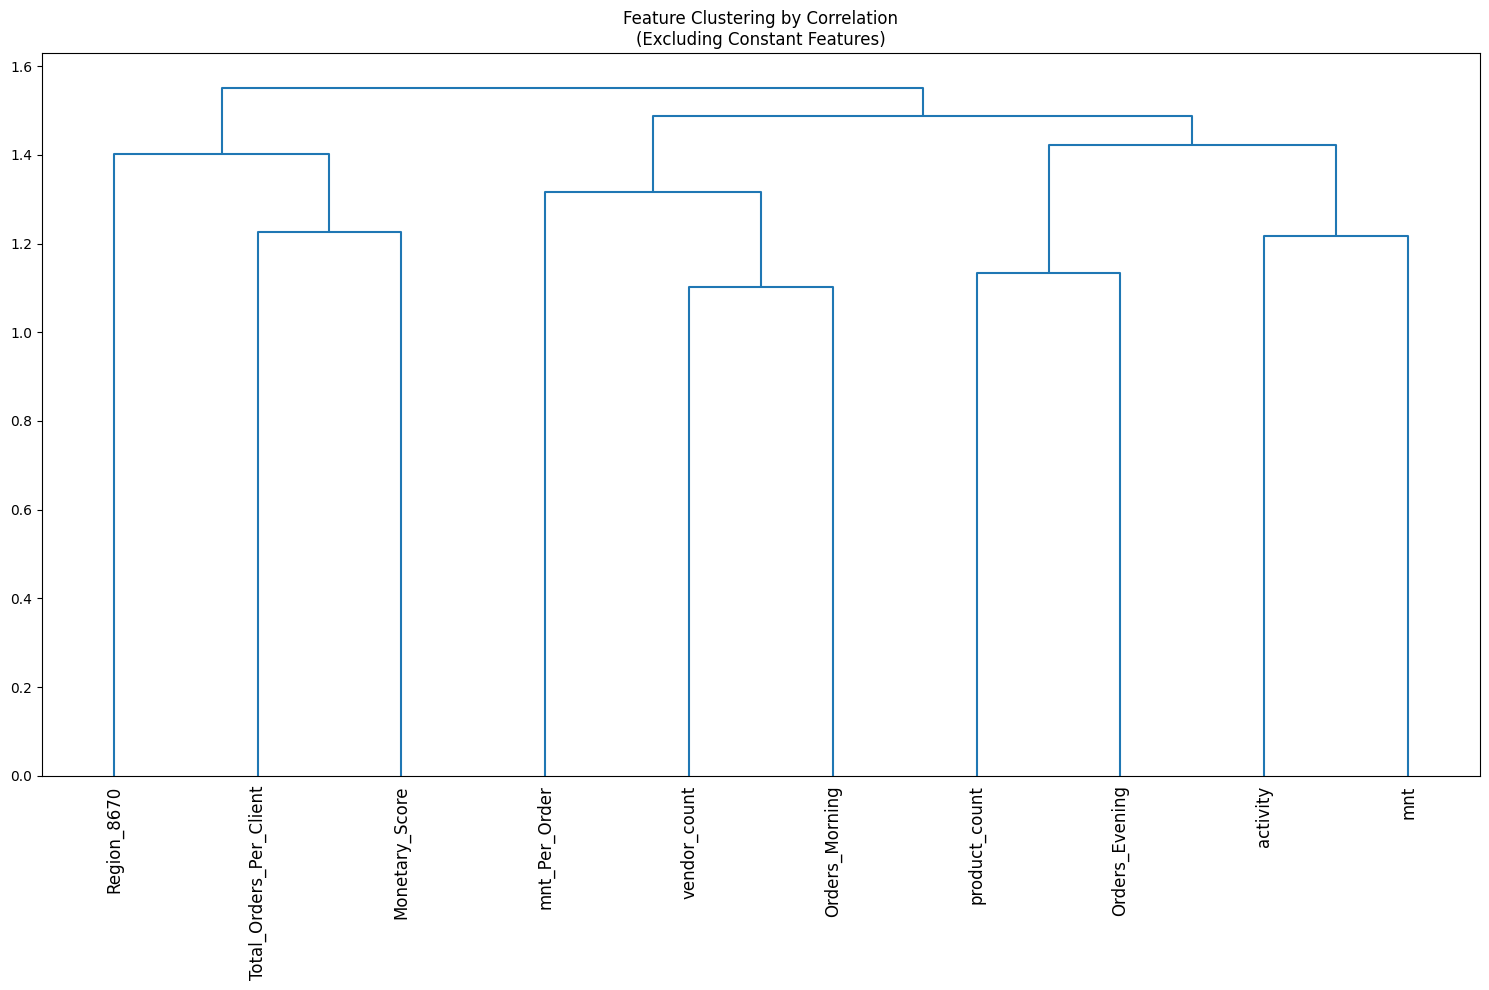

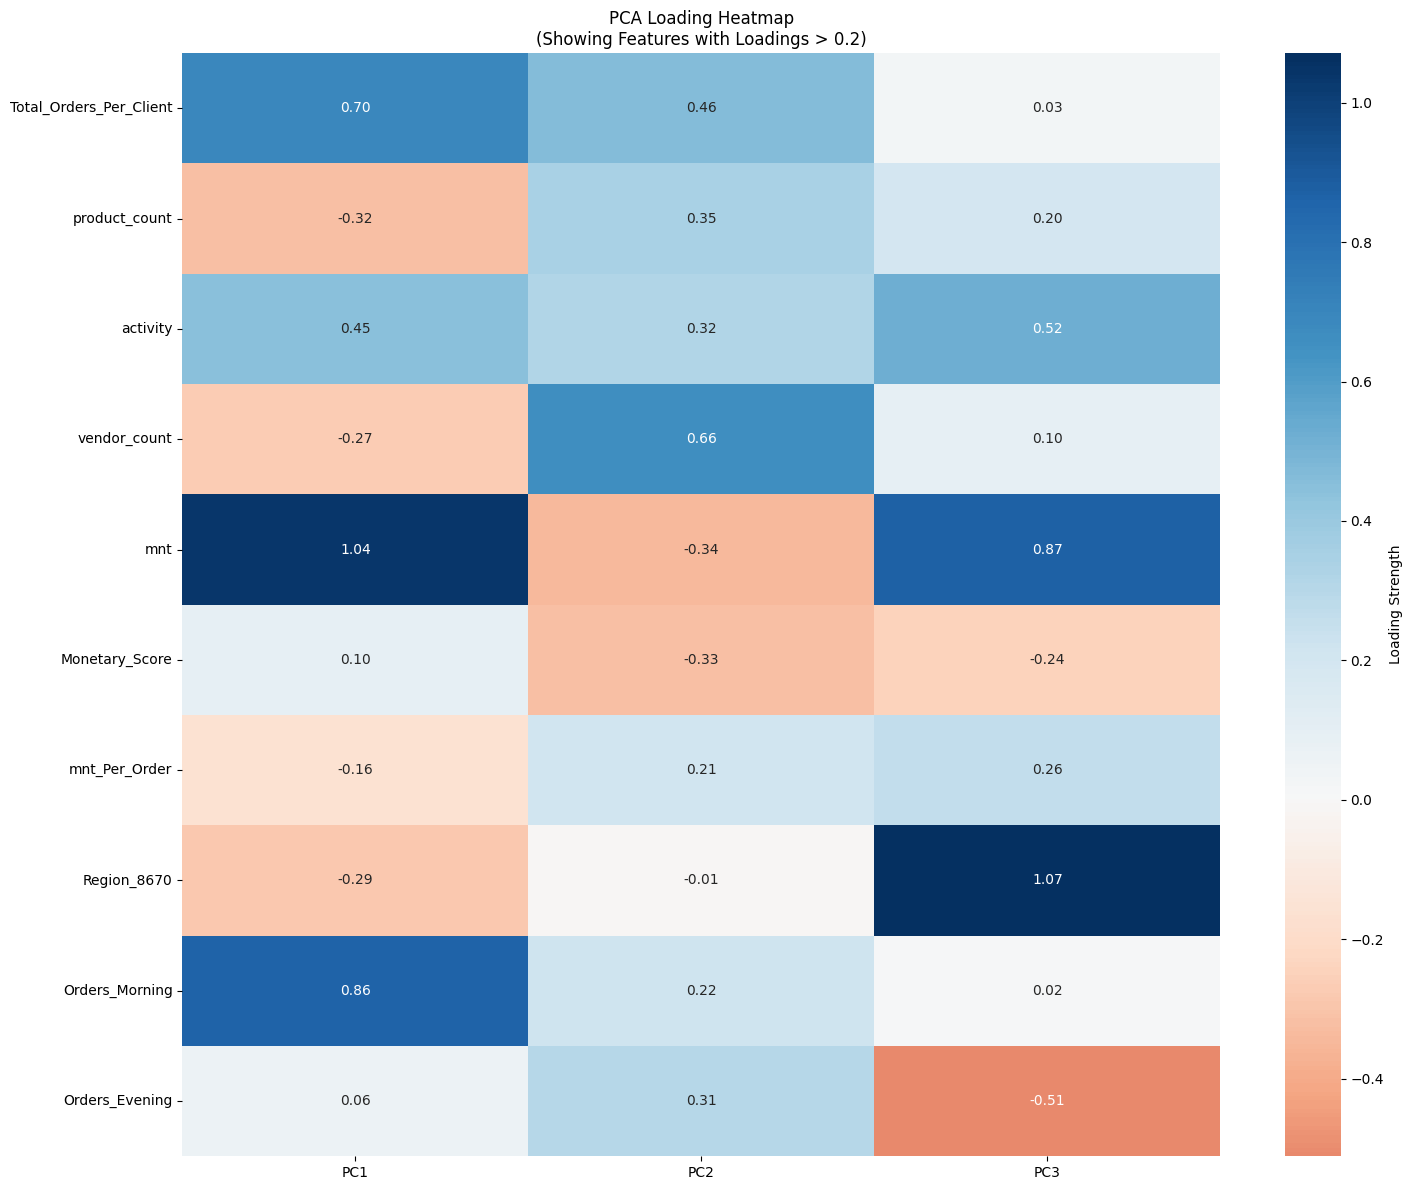

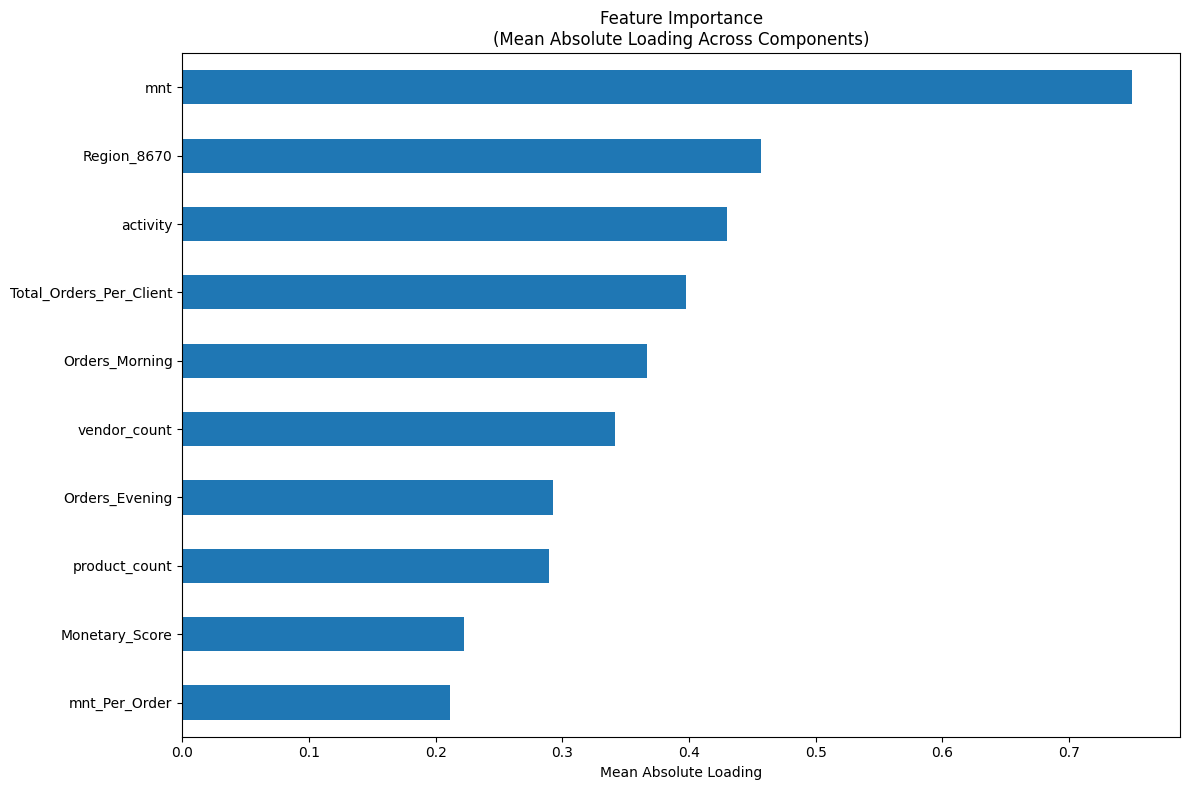


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

High importance features to keep:
   - vendor_count
   - Orders_Morning
   - Total_Orders_Per_Client
   - activity
   - Region_8670
   - mnt

Consider combining or reducing dimensionality of:
   - mnt_Per_Order
   - Monetary_Score
   - product_count
   - Orders_Evening

Consider dropping (low importance):


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

# Generate sample data
np.random.seed(42)
n_samples = 100
n_features = 10

# Create sample feature names
feature_names = [
    'Total_Orders_Per_Client', 'product_count', 'activity', 'vendor_count',
    'mnt', 'Monetary_Score', 'mnt_Per_Order', 'Region_8670',
    'Orders_Morning', 'Orders_Evening'
]

# Generate sample data
data = pd.DataFrame(
    np.random.randn(n_samples, n_features),
    columns=feature_names
)

# Create correlation matrix
corr_matrix = data.corr()

# Generate sample PCA loadings
loadings = pd.DataFrame(
    np.random.randn(n_features, 3) / 2,
    index=feature_names,
    columns=['PC1', 'PC2', 'PC3']
)

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    """
    Plot feature relationships with handling for infinite/nan values
    """
    # Create separate figures for better control
    plt.figure(figsize=(15, 10))

    # Handle infinite values in correlation matrix
    correlation_matrix_clean = correlation_matrix.fillna(0)

    # Filter out features with zero variance (constant features)
    var_mask = correlation_matrix_clean.var() != 0
    correlation_matrix_filtered = correlation_matrix_clean.loc[var_mask, var_mask]

    # Create distance matrix
    distance_matrix = 1 - np.abs(correlation_matrix_filtered)

    try:
        # Create linkage matrix for hierarchical clustering
        linkage_matrix = linkage(distance_matrix, method='ward')

        # Plot dendrogram
        dendrogram(linkage_matrix, labels=correlation_matrix_filtered.columns,
                  leaf_rotation=90)
        plt.title('Feature Clustering by Correlation\n(Excluding Constant Features)')
        plt.tight_layout()
        plt.savefig('feature_clustering.svg', format='svg', bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Could not create dendrogram due to: {str(e)}")
        print("Proceeding with heatmap visualization...")

    # Plot loading heatmap
    plt.figure(figsize=(15, 12))

    # Filter out near-zero loadings for clarity
    loadings_plot = loadings.copy()
    significant_features = (loadings_plot.abs() > 0.2).any(axis=1)
    loadings_significant = loadings_plot[significant_features]

    # Create heatmap
    sns.heatmap(loadings_significant,
                annot=True,
                cmap='RdBu',
                center=0,
                fmt='.2f',
                cbar_kws={'label': 'Loading Strength'})

    plt.title('PCA Loading Heatmap\n(Showing Features with Loadings > 0.2)')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('loading_heatmap.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Additional visualization: Feature importance plot
    plt.figure(figsize=(12, 8))

    # Calculate overall importance (mean absolute loading across components)
    importance = loadings_plot.abs().mean(axis=1)
    importance = importance[importance > 0.1]  # Filter out low importance features
    importance = importance.sort_values(ascending=True)

    # Create horizontal bar plot
    importance.plot(kind='barh')
    plt.title('Feature Importance\n(Mean Absolute Loading Across Components)')
    plt.xlabel('Mean Absolute Loading')
    plt.tight_layout()
    plt.savefig('feature_importance.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")

    # Group features based on importance scores
    high_importance = importance[importance > 0.3].index.tolist()
    medium_importance = importance[(importance > 0.2) & (importance <= 0.3)].index.tolist()
    low_importance = importance[importance <= 0.2].index.tolist()

    print("\nHigh importance features to keep:")
    for feature in high_importance:
        print(f"   - {feature}")

    print("\nConsider combining or reducing dimensionality of:")
    for feature in medium_importance:
        print(f"   - {feature}")

    print("\nConsider dropping (low importance):")
    for feature in low_importance:
        print(f"   - {feature}")

# Run the analysis
plot_feature_relationships_fixed(corr_matrix, loadings)


# Example usage:
plot_feature_relationships_fixed(corr_matrix, loadings)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    # [Previous code remains the same until the print statements]

    # Calculate overall importance (mean absolute loading across components)
    loadings_plot = loadings.iloc[:, :-1].copy()  # Exclude 'pattern' column
    importance = loadings_plot.abs().mean(axis=1)

    # Sort all features by importance
    importance_sorted = importance.sort_values(ascending=True)

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")
    print("\nBased on the analysis, you could reduce dimensions by:")

    # [Previous group prints remain the same]

    # Print features by importance thresholds
    print("\n=== FEATURE IMPORTANCE BREAKDOWN ===")

    # Very low importance features (< 0.1)
    print("\n5a. Very Low Importance Features (loading < 0.1):")
    very_low_importance = importance_sorted[importance_sorted < 0.1]
    for feature, value in very_low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Low importance features (0.1 - 0.2)
    print("\n5b. Low Importance Features (0.1 <= loading < 0.2):")
    low_importance = importance_sorted[(importance_sorted >= 0.1) & (importance_sorted < 0.2)]
    for feature, value in low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Medium importance features (0.2 - 0.3)
    print("\n5c. Medium Importance Features (0.2 <= loading < 0.3):")
    medium_importance = importance_sorted[(importance_sorted >= 0.2) & (importance_sorted < 0.3)]
    for feature, value in medium_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # High importance features (>= 0.3)
    print("\n5d. High Importance Features (loading >= 0.3):")
    high_importance = importance_sorted[importance_sorted >= 0.3]
    for feature, value in high_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Summary statistics
    print("\n=== SUMMARY STATISTICS ===")
    print(f"Total features: {len(importance_sorted)}")
    print(f"Features with loading < 0.1: {len(very_low_importance)}")
    print(f"Features with loading 0.1-0.2: {len(low_importance)}")
    print(f"Features with loading 0.2-0.3: {len(medium_importance)}")
    print(f"Features with loading >= 0.3: {len(high_importance)}")

    return importance_sorted

# Example usage:
importance_sorted = plot_feature_relationships_fixed(corr_matrix, loadings)


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

Based on the analysis, you could reduce dimensions by:

=== FEATURE IMPORTANCE BREAKDOWN ===

5a. Very Low Importance Features (loading < 0.1):

5b. Low Importance Features (0.1 <= loading < 0.2):
   - Region_8670: 0.150
   - Orders_Evening: 0.183
   - mnt_Per_Order: 0.186

5c. Medium Importance Features (0.2 <= loading < 0.3):
   - Monetary_Score: 0.212

5d. High Importance Features (loading >= 0.3):
   - product_count: 0.336
   - activity: 0.383
   - vendor_count: 0.463
   - Orders_Morning: 0.541
   - Total_Orders_Per_Client: 0.581
   - mnt: 0.691

=== SUMMARY STATISTICS ===
Total features: 10
Features with loading < 0.1: 0
Features with loading 0.1-0.2: 3
Features with loading 0.2-0.3: 1
Features with loading >= 0.3: 6


**List features with near-zero loadings across multiple PCs.**

Example: CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle_Dishes, CUI_OTHER, CUI_Street_Food/Snacks, CUI_Thai, Orders_Night, Orders_Dawn, Orders_Dusk, mnt_Per_Order, Items_Per_Order, frq, rcn, Recency_Score, Frequency_Score, Monetary_Score, CLV_Score.

**Combine Related Features:**

Cuisine Categories: Combine CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, etc., into a single feature like CUI_General.

Temporal Ordering: Combine Orders_Night, Orders_Dawn, Orders_Dusk into a single feature like Orders_Inactive_Periods.

RFM Scores: Combine Recency_Score, Frequency_Score, Monetary_Score into a single RFM_Score.

**Drop Irrelevant Features:**

Drop features that are not contributing to the variance and are not related to other features.

Example: mnt_Per_Order, Items_Per_Order, frq, rcn, CLV_Score.

**Model Convergence:**

Training loss decreased from 1.1 to 0.5
Validation loss decreased from 1.0 to 0.55
Stable convergence after ~150 epochs


Overfitting Assessment:


Loss difference stabilizes at -0.05
Small but persistent gap between training and validation loss
Suggests mild underfitting rather than overfitting


Reconstruction Error:


Right-skewed distribution
Most errors concentrated between 0.25-0.5
Long tail extending to 1.75
Indicates reasonable reconstruction for majority of samples

Recommendations:

Increase model capacity slightly (wider layers)
Reduce regularization strength
Consider increasing encoding dimensions to 12-16
Use cyclical learning rate

Epoch 1/200
8/8 - 6s - 804ms/step - loss: 1.0971 - val_loss: 0.9950 - learning_rate: 0.0010
Epoch 2/200
8/8 - 1s - 102ms/step - loss: 0.9756 - val_loss: 0.9645 - learning_rate: 0.0010
Epoch 3/200
8/8 - 0s - 41ms/step - loss: 0.9015 - val_loss: 0.9250 - learning_rate: 0.0010
Epoch 4/200
8/8 - 0s - 35ms/step - loss: 0.8603 - val_loss: 0.8853 - learning_rate: 0.0010
Epoch 5/200
8/8 - 0s - 25ms/step - loss: 0.8271 - val_loss: 0.8498 - learning_rate: 0.0010
Epoch 6/200
8/8 - 0s - 37ms/step - loss: 0.7967 - val_loss: 0.8156 - learning_rate: 0.0010
Epoch 7/200
8/8 - 0s - 38ms/step - loss: 0.7709 - val_loss: 0.7862 - learning_rate: 0.0010
Epoch 8/200
8/8 - 0s - 37ms/step - loss: 0.7469 - val_loss: 0.7624 - learning_rate: 0.0010
Epoch 9/200
8/8 - 0s - 40ms/step - loss: 0.7279 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 10/200
8/8 - 0s - 25ms/step - loss: 0.7168 - val_loss: 0.7359 - learning_rate: 0.0010
Epoch 11/200
8/8 - 0s - 37ms/step - loss: 0.7031 - val_loss: 0.7263 - learning_rate: 0.

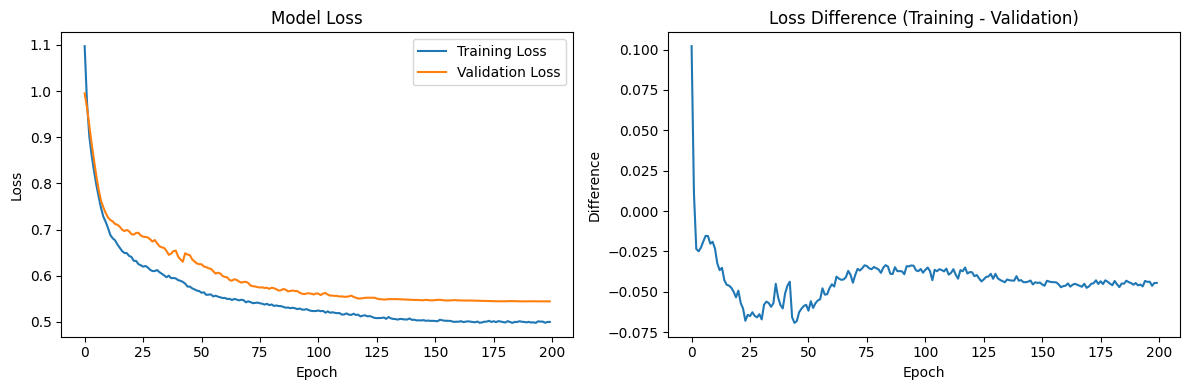

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


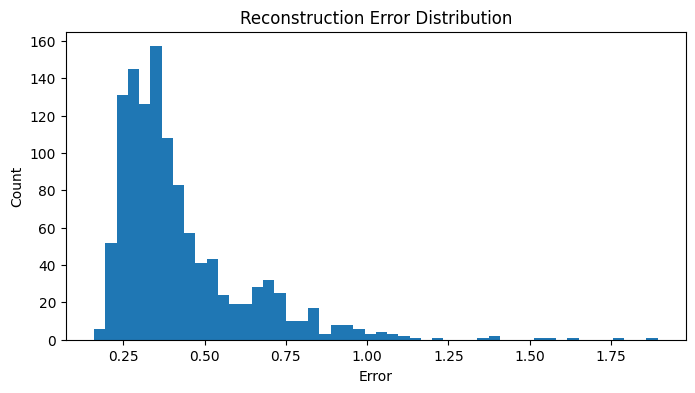

Mean reconstruction error: 0.4249
Std reconstruction error: 0.2047


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
import numpy as np

def create_improved_autoencoder(input_dim, encoding_dim=8):
    # Input layer
    inputs = layers.Input(shape=(input_dim,))

    # Encoder
    x = layers.Dense(512, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(256, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)

    # Encoded representation
    encoded = layers.Dense(encoding_dim, activation='relu',
                         kernel_regularizer=regularizers.l2(1e-4),
                         activity_regularizer=regularizers.l1(1e-4))(x)

    # Decoder
    x = layers.Dense(128, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-4))(encoded)
    x = layers.BatchNormalization()(x)

    x = layers.Dense(256, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(512, activation='relu',
                    kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    decoded = layers.Dense(input_dim, activation='sigmoid')(x)

    autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)

    return autoencoder, encoder

# Training with monitoring
autoencoder, encoder = create_improved_autoencoder(df_scaled.shape[1])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

# Early stopping with patience and monitoring both losses
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    mode='min'
)

# Learning rate reduction on plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

# Training
history = autoencoder.fit(
    df_scaled, df_scaled,
    epochs=200,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)

# Check for overfitting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.subtract(history.history['loss'], history.history['val_loss']))
plt.title('Loss Difference (Training - Validation)')
plt.xlabel('Epoch')
plt.ylabel('Difference')
plt.tight_layout()
plt.show()

# Get encodings and check distribution
encoded_data = encoder.predict(df_scaled)
reconstruction = autoencoder.predict(df_scaled)
reconstruction_error = np.mean(np.power(df_scaled - reconstruction, 2), axis=1)

plt.figure(figsize=(8, 4))
plt.hist(reconstruction_error, bins=50)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

print(f"Mean reconstruction error: {np.mean(reconstruction_error):.4f}")
print(f"Std reconstruction error: {np.std(reconstruction_error):.4f}")

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming you've already scaled your data and have the encoded features
df_scaled = df_scaled
encoded_features = encoded_data

# Define and fit the K-Means model
n_clusters = 5 # Number of clusters to use
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(encoded_features)

# Get cluster assignments and reconstruction error
clusters = kmeans.predict(encoded_features)
recon_error = kmeans.score(encoded_features)

# Create feature names for encoded dimensions
encoded_cols = [f'encoded_dim_{i}' for i in range(encoded_features.shape[1])]

# Combine original data with encoded features and cluster assignments
clustering_df = pd.DataFrame(encoded_features, columns=encoded_cols)
clustering_df['cluster'] = clusters
clustering_df['reconstruction_error'] = recon_error

# Add original index if available
if hasattr(df_scaled, 'index'):
    clustering_df.index = df_scaled.index

# Display cluster statistics
print("\nCluster Distribution:")
print(clustering_df['cluster'].value_counts())

print("\nMean Reconstruction Error by Cluster:")
print(clustering_df.groupby('cluster')['reconstruction_error'].mean())

# Return the dataframe
clustering_df.head()


Cluster Distribution:
cluster
4    627
0    197
1    160
3    119
2     77
Name: count, dtype: int64

Mean Reconstruction Error by Cluster:
cluster
0   -364.372406
1   -364.372406
2   -364.372406
3   -364.372406
4   -364.372406
Name: reconstruction_error, dtype: float64


,encoded_dim_0,encoded_dim_1,encoded_dim_2,encoded_dim_3,encoded_dim_4,encoded_dim_5,encoded_dim_6,encoded_dim_7,cluster,reconstruction_error
0,0.000000,0.0,0.366522,0.000000,0.000000,0.215147,0.000000,0.448448,0,-364.372406
1,0.000000,0.0,0.000000,0.000000,0.711041,0.000000,0.000000,0.000000,4,-364.372406
2,0.000000,0.0,0.000000,0.000000,0.413018,0.000000,0.000000,0.000000,4,-364.372406
3,0.769201,0.0,0.000000,0.657485,0.000000,0.000000,0.335369,0.306389,1,-364.372406
4,0.000000,0.0,0.000000,0.000000,0.203087,0.000000,0.000000,0.230412,4,-364.372406


Encoded data statistics:
Mean: [0.12838943 0.05309654 0.10455947 0.08411508 0.15352482 0.12712163
 0.14865503 0.133997  ]
Standard deviation: [0.26277593 0.2012196  0.24198869 0.2552727  0.24226846 0.185912
 0.28707793 0.2560864 ]
Correlation matrix:
[[ 1.          0.13467485  0.15241369 -0.03457205 -0.00398505 -0.14822936
   0.12622813  0.20680975]
 [ 0.13467485  1.         -0.08755064  0.02395681 -0.05736228 -0.04178063
   0.03694136 -0.06701436]
 [ 0.15241369 -0.08755064  1.         -0.1157623   0.19042723 -0.2148103
   0.08883387  0.19841117]
 [-0.03457205  0.02395681 -0.1157623   1.          0.02716288 -0.01578048
   0.164999    0.00987847]
 [-0.00398505 -0.05736228  0.19042723  0.02716288  1.         -0.08773484
   0.21120683  0.05508539]
 [-0.14822936 -0.04178063 -0.2148103  -0.01578048 -0.08773484  1.
  -0.29518083 -0.2378038 ]
 [ 0.12622813  0.03694136  0.08883387  0.164999    0.21120683 -0.29518083
   1.          0.28692957]
 [ 0.20680975 -0.06701436  0.19841117  0.00987847  

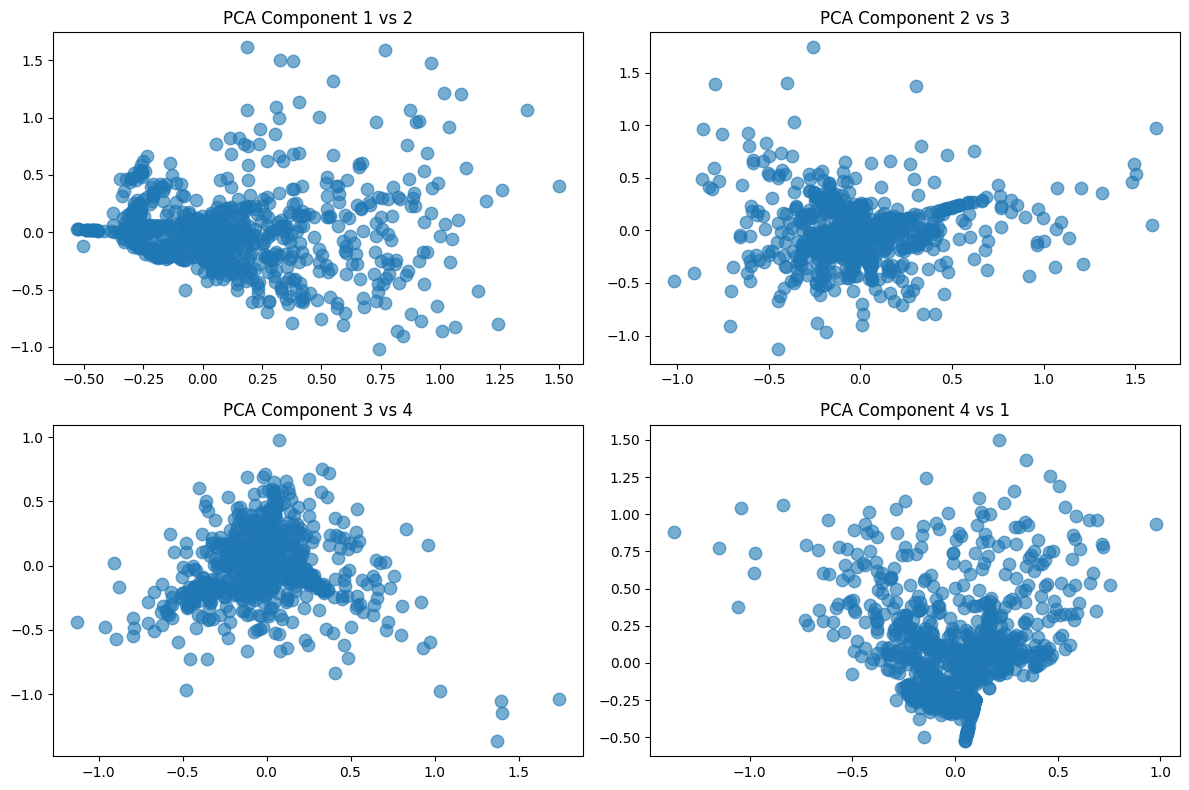


Correlations between original features and encoded features:


AttributeError: 'ellipsis' object has no attribute 'columns'

In [29]:
# Second script: Additional analysis on the autoencoder results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Print summary statistics of the 4D encoded data
print("Encoded data statistics:")
print(f"Mean: {np.mean(encoded_data, axis=0)}")
print(f"Standard deviation: {np.std(encoded_data, axis=0)}")
print(f"Correlation matrix:\n{np.corrcoef(encoded_data.T)}")

# Perform PCA on the encoded data
pca = PCA(n_components=4)
pca_data = pca.fit_transform(encoded_data)

# Explain variance ratio of PCA components
print("\nPCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot PCA components
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    axes[i].scatter(pca_data[:, i], pca_data[:, (i+1)%4], alpha=0.6, s=80)
    axes[i].set_title(f"PCA Component {i+1} vs {(i+1)%4+1}")

plt.tight_layout()
plt.show()

# Check for correlations between original features and encoded features
print("\nCorrelations between original features and encoded features:")
for i, col in enumerate(df_scaled.columns):
    for j in range(4):
        corr, _ = pearsonr(df_scaled[col], encoded_data[:, j])
        print(f"Feature {col} vs Encoded Feature {j}: {corr:.3f}")

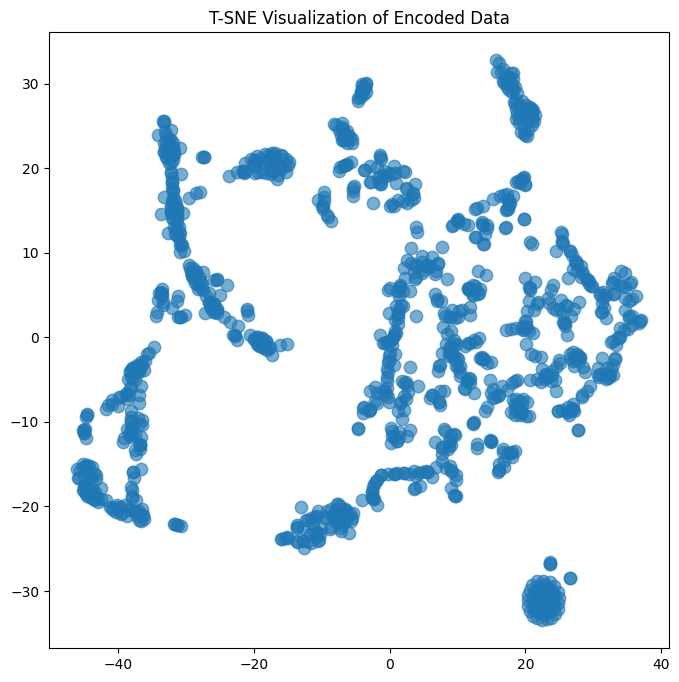

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


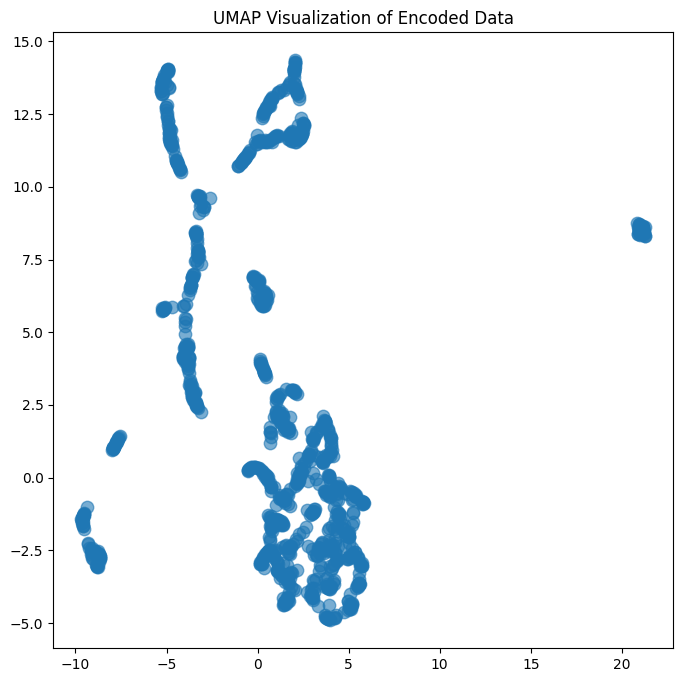

In [30]:
# T-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(encoded_data)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.6, s=80)
ax.set_title("T-SNE Visualization of Encoded Data")
plt.show()

# UMAP visualization
umap_data = umap.UMAP(n_components=2, random_state=42).fit_transform(encoded_data)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.6, s=80)
ax.set_title("UMAP Visualization of Encoded Data")
plt.show()

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_improved_cluster_analysis(df, feature_importance):
    # Set style parameters
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['grid.color'] = 'gray'
    plt.rcParams['grid.alpha'] = 0.2

    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

    # 1. Top discriminating features by cluster
    ax1 = fig.add_subplot(gs[0, :])
    top_features = feature_importance.head(6)['feature'].tolist()
    plot_data = df.melt(id_vars=['cluster'], value_vars=top_features)

    sns.boxplot(data=plot_data, x='variable', y='value', hue='cluster',
                ax=ax1, width=0.7, palette='viridis')
    ax1.set_title('Top 6 Discriminating Features by Cluster', fontsize=14, pad=20)
    ax1.set_xlabel('Features', fontsize=12)
    ax1.set_ylabel('Value', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(title='Cluster', title_fontsize=12)

    # 2. Feature importance
    ax2 = fig.add_subplot(gs[1, 0])
    sns.barplot(data=feature_importance.head(10),
                x='importance', y='feature',
                ax=ax2, palette='viridis')
    ax2.set_title('Feature Importance in Clustering', fontsize=14, pad=20)
    ax2.set_xlabel('Importance Score', fontsize=12)
    ax2.set_ylabel('Feature', fontsize=12)

    # 3. Reconstruction error distribution
    ax3 = fig.add_subplot(gs[1, 1])
    violin = sns.violinplot(data=df, x='cluster', y='reconstruction_error',
                          ax=ax3, inner='box', palette='viridis')
    ax3.set_title('Reconstruction Error Distribution by Cluster', fontsize=14, pad=20)
    ax3.set_xlabel('Cluster', fontsize=12)
    ax3.set_ylabel('Reconstruction Error', fontsize=12)

    # Add cluster sizes
    for i, cluster in enumerate(df['cluster'].unique()):
        count = len(df[df['cluster'] == cluster])
        ax3.text(i, ax3.get_ylim()[0], f'n={count}',
                horizontalalignment='center', verticalalignment='top')

    plt.tight_layout()
    plt.show()

    # Print cluster characteristics
    print("\nCluster Profiles:")
    print("-" * 50)
    for cluster in sorted(df['cluster'].unique()):
        cluster_data = df[df['cluster'] == cluster]
        print(f"\nCluster {cluster} (n={len(cluster_data)})")
        print("Key characteristics:")
        for feature in top_features:
            mean_val = cluster_data[feature].mean()
            std_val = cluster_data[feature].std()
            print(f"- {feature}: {mean_val:.2f} ± {std_val:.2f}")

# Generate visualization
plot_improved_cluster_analysis(analysis_df, feature_importance)

NameError: name 'analysis_df' is not defined

In [33]:
import pandas as pd
import numpy as np

def analyze_clusters(df):
    categories = {
        "Behavioral": ['vendor_count', 'product_count', 'Total_Orders_Per_Client',
                      'Items_Per_Order', 'CUI_diversity', 'activity', 'Loyalty', 'frq', 'rcn'],
        "Economic": ['mnt', 'mnt_Per_Order', 'Monetary_Score', 'CLV_Score',
                    'Frequency_Score', 'Recency_Score'],
        "Cuisine Preferences": ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                              'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
                              'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
                              'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks',
                              'CUI_Thai'],
        "Time Patterns": ['Orders_Night', 'Orders_Dawn', 'Orders_Morning',
                         'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk',
                         'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'],
        "Demographics (Age Groups)": ['Age_Group_<18', 'Age_Group_18-24', 'Age_Group_25-34',
                                    'Age_Group_35-44', 'Age_Group_45-54', 'Age_Group_55+'],
        "Regional": ['Region_8670', 'Region_4660', 'Region_2360', 'Region_Other'],
        "Payment Methods": ['payment_method_CARD', 'payment_method_CASH', 'payment_method_DIGI'],
        "Promotions": ['last_promo_-', 'last_promo_DELIVERY', 'last_promo_DISCOUNT',
                      'last_promo_FREEBIE']
    }

    for cluster in sorted(df['cluster'].unique()):
        if pd.isna(cluster):
            continue

        cluster_data = df[df['cluster'] == cluster]
        print(f"\nCluster {cluster} (n={len(cluster_data)}):")
        print("-" * 50)

        for category, metrics in categories.items():
            print(f"\n{category}:")
            print("-" * 30)

            if category in ["Demographics (Age Groups)", "Payment Methods", "Promotions"]:
                for col in metrics:
                    try:
                        mean_val = float(cluster_data[col].mean() * 100)
                        std_val = float(cluster_data[col].std() * 100)
                        label = col.split('_', 1)[1] if '_' in col else col  # Remove prefix
                        print(f"{label:>10}: {mean_val:8.2f}% ± {std_val:6.2f}%")
                    except:
                        continue
            else:
                for metric in metrics:
                    if metric in cluster_data.columns:
                        mean = cluster_data[metric].astype(float).mean()
                        std = cluster_data[metric].astype(float).std()
                        print(f"{metric:<30} mean: {mean:8.2f} ± {std:8.2f}")

# Run the analysis
analyze_clusters(encoded_data)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices